In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
# from IPython import display

In [9]:
df = pd.read_excel('./materical_group2.xlsx')
df.head(1)

,Unnamed: 0,Unnamed: 0.1,material_group_code,material_group_name,risk1,risk2,risk3,risk4,risk5,risk6,risk7,risk8,risk9,risk10,risk11,risk12,risk13,risk14,risk15,risk16,risk17,risk18,risk19,risk20,risk21,risk22,risk23,risk24,money1,money2,money3,money4,money5,money6,money7,money8,money9,risk_label,money_label,risk_score,money_score
0,0,0,1,材料组1,417,699,126,225,201,277,747,108,655,50,789,518,794,182,738,461,976,938,165,688,721,181,374,150,21,86,466,287,536,206,191,747,524,0,0,11180,3064


In [10]:
#数据一览
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,400.0,199.5000,115.614301,0.0,99.75,199.5,299.25,399.0
Unnamed: 0.1,400.0,199.5000,115.614301,0.0,99.75,199.5,299.25,399.0
material_group_code,400.0,200.5000,115.614301,1.0,100.75,200.5,300.25,400.0
risk1,400.0,488.5375,289.029087,2.0,250.75,467.5,742.50,999.0
risk2,400.0,486.7475,295.459192,2.0,229.75,480.0,744.25,999.0
risk3,400.0,498.6675,287.315816,3.0,237.75,489.5,765.25,998.0
risk4,400.0,508.2800,277.356437,5.0,255.75,498.0,756.50,999.0
risk5,400.0,496.7375,273.408053,1.0,270.25,515.5,716.25,994.0
risk6,400.0,497.8300,308.945772,2.0,213.00,504.0,771.00,997.0
risk7,400.0,523.5500,276.530288,1.0,284.50,528.5,750.00,997.0


In [20]:
data_material_group_name = df['material_group_name']
df.drop(['risk_score', 'money_score'], axis=1, inplace=True)

### 一、构建两个逻辑回归的x和y：risk_x risk_y  money_x money_y

1.构建特征名

In [21]:
risk_cols = ['risk' + str(x) for x in range(1,25)]
# risk_cols = [x for x in df.columns if x[:4]=='risk'].remove('risk_label')
x_risk = df[risk_cols]
y_risk = df['risk_label']

money_cols = ['money' + str(x) for x in range(1,10)]
# money_cols = [str(x) for x in df.columns if x.startswith('money')]
x_money = df[money_cols]
y_money = df['money_label']

In [23]:
print(money_cols)

['money1', 'money2', 'money3', 'money4', 'money5', 'money6', 'money7', 'money8', 'money9']


2) 切分数据集 train_test_split(random_state=33) 控制切分集不随机

In [25]:
from sklearn.utils import shuffle
X_money_shuffle, y_money_shuffle = shuffle(x_money, y_money)
x_risk_train, x_risk_test, y_risk_train, y_risk_test = train_test_split(x_risk, df['risk_label'],test_size=0.1, random_state=33)
x_money_train, x_money_test, y_money_train, y_money_test = train_test_split(x_money, df['money_label'],test_size=0.1, random_state=33)
# x_money_test.shape (40,9) 40个样本 10个特征  y_money_test.shape (40,)

3)逻辑回归：对风险性（risk）进行建模

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, recall_score

C=0.2
max_iter = 150
model_risk = LogisticRegression(C=C, max_iter=max_iter, penalty='l2', tol=0.0001, class_weight='balanced') # penalty='l2' l2正则 tol=0.0001
model_risk.fit(x_risk_train, y_risk_train)
y_risk_pred = model_risk.predict(x_risk_test)
accuracy = accuracy_score(y_risk_test, y_risk_pred)
f1 = f1_score(y_risk_test, y_risk_pred)
recall = recall_score(y_risk_test, y_risk_pred)
print('accuracy: {}%, f1: {:.2f}%, recall: {:.2f}%'.format(accuracy * 100, f1 * 100, recall * 100))

accuracy: 92.5%, f1: 91.89%, recall: 94.44%


4)使用交叉验证的方式对模型进行评估

In [32]:
from sklearn.model_selection import cross_val_score
# 针对准确率进行优化
cross_val_score(model_risk,x_risk_train,y_risk_train,cv=5,scoring='accuracy').mean()
# scoring='recall', 'f1'

0.9555555555555555

### 调参优化
5)网格搜索优化参数

In [33]:
'''由于贝叶斯调参包的不稳定性，使用GridSearchCV调参'''

# 贝叶斯优化进行参数调整
def lr_risk_cv(C, max_iter):
    results = cross_val_score(model_risk, x_risk,y_risk,cv=5, scoring='accuracy').mean()
    return results

from bayes_opt import BayesianOptimization
lr_risk_op = BayesianOptimization(
    f = lr_risk_cv,
    pbounds = {'C':(0.01, 20),
              'max_iter':(30,600)})
lr_risk_op.maximize(init_points=2, n_iter=3, acq='ei')
print(lr_risk_op)

# ValueError: array must not contain infs or NaNs

|   iter    |  target   |     C     | max_iter  |
-------------------------------------------------
|  1        |  0.955    |  16.85    |  571.6    |
|  2        |  0.955    |  19.11    |  524.1    |
|  3        |  0.955    |  6.647    |  30.29    |
|  4        |  0.955    |  17.66    |  30.27    |
|  5        |  0.955    |  0.7636   |  598.8    |


网格调参

In [35]:
from sklearn.model_selection import GridSearchCV
param_dist = {'C':[0.1, 0.15, 0.2,0.22, 0.24, 0.25, 0.38],
              'max_iter':[30, 50, 100, 120, 150, 200],
    
}
grid_search_risk = GridSearchCV(model_risk, n_jobs=-1, 
                                param_grid=param_dist,
                                cv=5, 
                                scoring='accuracy',
                                verbose=1
            ).fit(x_risk_train, y_risk_train)
print('grid_search_risk.best_estimator_', grid_search_risk.best_estimator_)
print('best_score_', grid_search_risk.best_score_)
# model_risk :LogisticRegression(C=0.38, class_weight='balanced', max_iter=150), 0.8500000000000002

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    2.1s


grid_search_risk.best_estimator_ LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
best_score_ 0.9555555555555555


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    3.5s finished


6）逻辑回归：对金额数（money）进行建模

In [41]:
C = 0.085
max_iter = 60

model_money = LogisticRegression(C=C, max_iter=max_iter, penalty='l2', tol=0.0001, class_weight='balanced')
model_money.fit(x_money_train, y_money_train)
y_money_pred = model_money.predict(x_money_test)
f1 = f1_score(y_money_pred, y_money_test)
recall = recall_score(y_money_pred, y_money_test)
accuracy = accuracy_score(y_money_pred, y_money_test)
print('accuracy: {}%, f1: {:.2f}%, recall: {:.2f}%'.format(accuracy * 100, f1 * 100, recall * 100))

accuracy: 82.5%, f1: 0.00%, recall: 0.00%


7）网格搜索调参

In [39]:
param_dist = {'C':[0.08, 0.085, 0.09, 0.1],
             'max_iter':[30, 40, 50, 60, 70,80, 100]}
grid_search_money = GridSearchCV(model_money, n_jobs=-1,param_grid=param_dist, cv=5,scoring='accuracy',verbose=5)
grid_search_money.fit(x_money_train, y_money_train)
grid_search_money.best_estimator_, grid_search_money.best_score_, 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 133 out of 140 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    2.1s finished


(LogisticRegression(C=0.085, class_weight='balanced', dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 0.9277777777777778)

8）使用K折交叉验证对模型进行评价

In [21]:
cross_val_score(model_money, x_money,y_money,cv=5,scoring='accuracy').mean()
# cross_val_score(model_risk,x_risk,y_risk,cv=5,scoring='accuracy').mean()

0.915

## 二、评分卡规则转换

#### 1.得到woe规则

In [42]:
# 有risk_label 和 自变量risk
# risk_cols = [i for i in df.columns if i.startswith('risk')]
risk_cols = ['risk' + str(x) for x in range(1, 25)]
x_risk = df[risk_cols]
y_risk = df['risk_label']

In [43]:
x_risk.head(1)

,risk1,risk2,risk3,risk4,risk5,risk6,risk7,risk8,risk9,risk10,risk11,risk12,risk13,risk14,risk15,risk16,risk17,risk18,risk19,risk20,risk21,risk22,risk23,risk24
0,417,699,126,225,201,277,747,108,655,50,789,518,794,182,738,461,976,938,165,688,721,181,374,150


#### 2.使用WOE+LR建模

1)等频：得到分箱字段

In [44]:
def get_bin_features(data, q=10):
    columns = data.columns
    for column in columns:
        data['bin_' + column] = pd.qcut(data[column], q=q, duplicates='drop') # 跨多个箱使用 duplicates='drop'
    return data

In [45]:
bin_cols = ['bin_risk' + str(x) for x in range(1, 25)]
print(bin_cols)

['bin_risk1', 'bin_risk2', 'bin_risk3', 'bin_risk4', 'bin_risk5', 'bin_risk6', 'bin_risk7', 'bin_risk8', 'bin_risk9', 'bin_risk10', 'bin_risk11', 'bin_risk12', 'bin_risk13', 'bin_risk14', 'bin_risk15', 'bin_risk16', 'bin_risk17', 'bin_risk18', 'bin_risk19', 'bin_risk20', 'bin_risk21', 'bin_risk22', 'bin_risk23', 'bin_risk24']


In [46]:
'''在原始数据的基础上直接增加bin_risk字段，需要copy一份，分箱的字段单独放在一个表里面'''
x_data = x_risk.copy()
y_data = y_risk.copy()
get_bin_features(x_data).head(1)

,risk1,risk2,risk3,risk4,risk5,risk6,risk7,risk8,risk9,risk10,risk11,risk12,risk13,risk14,risk15,risk16,risk17,risk18,risk19,risk20,risk21,risk22,risk23,risk24,bin_risk1,bin_risk2,bin_risk3,bin_risk4,bin_risk5,bin_risk6,bin_risk7,bin_risk8,bin_risk9,bin_risk10,bin_risk11,bin_risk12,bin_risk13,bin_risk14,bin_risk15,bin_risk16,bin_risk17,bin_risk18,bin_risk19,bin_risk20,bin_risk21,bin_risk22,bin_risk23,bin_risk24
0,417,699,126,225,201,277,747,108,655,50,789,518,794,182,738,461,976,938,165,688,721,181,374,150,"(366.2, 467.5]","(583.0, 699.0]","(102.9, 189.0]","(216.8, 314.1]","(116.5, 212.6]","(270.5, 384.6]","(707.3, 795.6]","(102.6, 201.8]","(605.4, 702.5]","(2.999, 78.8]","(786.6, 895.1]","(428.4, 528.5]","(793.2, 907.1]","(176.4, 251.7]","(719.6, 796.8]","(394.2, 523.5]","(908.2, 997.0]","(885.5, 998.0]","(107.9, 222.4]","(671.6, 779.2]","(690.6, 821.8]","(109.7, 192.8]","(373.6, 451.5]","(90.9, 197.8]"


2)计算IV值以筛选变量

In [47]:
def cal_IV(data, feature, target):
    lst = []
    cols = ['Variable','Value','All','Bad'] #value=feature=bin_age All是Value个数  Bad=bad个数
    for i in range(data[feature].nunique()): # nunique = unique的个数 比如：bin_age的 value值一共有6个。
        val = list(data[feature].unique())[i] # 第 i 个value：从feature字段中取出所有value的名字  eg:共6个 [(40.0, 50.0], (25.0, 40.0], (70.0, inf], (50.0, 60.0], (60.0, 70.0], (-inf, 25.0]]
        # 统计feature，feature_value, 这个value的个数，这个value导致target=1
        temp1 = data[data[feature]==val].count()[feature] # 在feature字段中找到其总数
        temp2 = data[(data[feature]==val) & (data[target]==1)].count()[feature]  # target=1的个数
#         print(feature, val, temp1, temp2) # 比如：bin_age (40.0, 50.0] 35037 2893 在bin_age字段中找到
        lst.append([feature, val, temp1, temp2])
#     print('lst',lst)   # temp1=All temp2=Bad

    data = pd.DataFrame(lst, columns=cols)
    data = data[data['Bad'] > 0]
    data['Share'] = data['All'] / data['All'].sum() # share是每个 value的比例， 比如：(40.0, 50.0]的比例
    data['Bad_Rate'] = data['Bad'] / data['All'] # value导致bad的情况在这个value的比例： （40,50]中bad 占整个（40,50]的情况： 2893/35037
    data['Distribution_Bad'] = (data['Bad'] + 0.5) / data['Bad'].sum() #这个value导致bad 在所有bad中的情况
    data['Distribution_Good'] = (data['All'] - data['Bad'] + 0.5) / (data['All'].sum() - data['Bad'].sum()) # (35037-2893)/[data.All.sum() - data.Bad.sum()]
    data['WOE'] = np.log1p(data['Distribution_Bad'] / data['Distribution_Good'])
#     data['IV'] = ((data['Distribution_Bad'] - data['Distribution_Good']) * data['WOE']).sum()
    data['IV'] = (data['Distribution_Bad'] - data['Distribution_Good']) * data['WOE']
    
    data.sort_values(by=['Variable','Value'], ascending=True)
#     print(data)
    return data['IV'].sum() # 获得IV值

In [48]:
x_data.head(1)

,risk1,risk2,risk3,risk4,risk5,risk6,risk7,risk8,risk9,risk10,risk11,risk12,risk13,risk14,risk15,risk16,risk17,risk18,risk19,risk20,risk21,risk22,risk23,risk24,bin_risk1,bin_risk2,bin_risk3,bin_risk4,bin_risk5,bin_risk6,bin_risk7,bin_risk8,bin_risk9,bin_risk10,bin_risk11,bin_risk12,bin_risk13,bin_risk14,bin_risk15,bin_risk16,bin_risk17,bin_risk18,bin_risk19,bin_risk20,bin_risk21,bin_risk22,bin_risk23,bin_risk24
0,417,699,126,225,201,277,747,108,655,50,789,518,794,182,738,461,976,938,165,688,721,181,374,150,"(366.2, 467.5]","(583.0, 699.0]","(102.9, 189.0]","(216.8, 314.1]","(116.5, 212.6]","(270.5, 384.6]","(707.3, 795.6]","(102.6, 201.8]","(605.4, 702.5]","(2.999, 78.8]","(786.6, 895.1]","(428.4, 528.5]","(793.2, 907.1]","(176.4, 251.7]","(719.6, 796.8]","(394.2, 523.5]","(908.2, 997.0]","(885.5, 998.0]","(107.9, 222.4]","(671.6, 779.2]","(690.6, 821.8]","(109.7, 192.8]","(373.6, 451.5]","(90.9, 197.8]"


In [49]:
'''计算 data中 bin字段的 IV 值，target为目标列'''
def cal_all_IV(data, target, threhold=0):
    result = {}
    for col in bin_cols:
        temp_IV = cal_IV(data, col, target)
        print(col, temp_IV)
        result[col] = temp_IV
    return result

In [50]:
'''计算各个 bin字段的IV值'''
x_data['risk_target'] = y_data # 在DataFrame中增加一列的写法
cal_IVs = cal_all_IV(x_data, 'risk_target')

bin_risk1 0.06455090509428993
bin_risk2 0.08295191000471147
bin_risk3 0.09939542546123693
bin_risk4 0.09627528550230217
bin_risk5 0.07774121190063488
bin_risk6 0.11772453677027017
bin_risk7 0.08914551129840716
bin_risk8 0.22301276602175693
bin_risk9 0.140243537817394
bin_risk10 0.0943311630803119
bin_risk11 0.09544069398769642
bin_risk12 0.08904156362276515
bin_risk13 0.054451545217396195
bin_risk14 0.05614378537573646
bin_risk15 0.23724429634791971
bin_risk16 0.18349471446971916
bin_risk17 0.07025461619556836
bin_risk18 0.10011303198578679
bin_risk19 0.058225238296564466
bin_risk20 0.08379723429683256
bin_risk21 0.0949653244809207
bin_risk22 0.0430972444299021
bin_risk23 0.14293538901228411
bin_risk24 0.11943101825050231


In [51]:
'''返回IV值大于threshold的 bin字段名称'''
def cal_filtered_IV(cal_IVs, threshold=0.1):
    result = {k:v for k,v in cal_IVs.items() if v >= threshold}
    return result.keys() # 通过key拿到字典形式
'''result是元组内容 '''

'result是元组内容 '

In [52]:
col_filter = cal_filtered_IV(cal_IVs)
col_filter

dict_keys(['bin_risk6', 'bin_risk8', 'bin_risk9', 'bin_risk15', 'bin_risk16', 'bin_risk18', 'bin_risk23', 'bin_risk24'])

3)计算筛选后变量的woe，方便分箱

In [53]:
def cal_WOE(data, features, target):
    data_new = data
    for feature in features:
#         data_woe1 = data_new.groupby(feature).agg(['sum','count']) # 求出根据 feature 分组之后每组的 sum和 count
        # target:['sum','count'] 相当于 feature分组之后的众多组数中筛选出 target 的那组
        data_woe = data_new.groupby(feature).agg({target:['sum', 'count']}) # (-0.001, 1.0] sum=7420  count=108526
#         print(data_woe1)
#         print(data_woe.columns)
        # 查看 columns的名字，方便后面的重命名操作 columns={target+'sum'}
        data_woe.columns = list(map(''.join, data_woe.columns)) #做求和
#         print(data_woe.columns)  # [target+'sum' = SeriousDlqin2yrssum', 'SeriousDlqin2yrscount']
        
        data_woe = data_woe.reset_index().rename(columns={target+'sum':'bad', target+'count':'all'})
#         print(data_woe)

        data_woe['good'] = data_woe['all'] - data_woe['bad']
        data_woe = data_woe[[feature, 'good', 'bad']]
        # 为了避免分母为0 在 bad 和 good 
        data_woe['bad_rate'] = (data_woe['bad'] + 0.5) / data_woe['bad'].sum()
        data_woe['good_rate'] = (data_woe['good'] + 0.5) / data_woe['good'].sum()
        # 计算woe
#         data_woe['woe'] = data_woe['bad_rate'].divide(data_woe['good_rate'])
        data_woe['woe'] = np.log1p(data_woe['bad_rate'] / data_woe['good_rate'])
        # 在后面拼接上 _feature, 比如 _age
        data_woe.columns = [c if c==feature else c+'_'+feature for c in list(data_woe.columns.values)]
        # 拼接
        data_new = data_new.merge(data_woe, on=feature, how='left')
    return data_new

In [54]:
x_data.head(1)

,risk1,risk2,risk3,risk4,risk5,risk6,risk7,risk8,risk9,risk10,risk11,risk12,risk13,risk14,risk15,risk16,risk17,risk18,risk19,risk20,risk21,risk22,risk23,risk24,bin_risk1,bin_risk2,bin_risk3,bin_risk4,bin_risk5,bin_risk6,bin_risk7,bin_risk8,bin_risk9,bin_risk10,bin_risk11,bin_risk12,bin_risk13,bin_risk14,bin_risk15,bin_risk16,bin_risk17,bin_risk18,bin_risk19,bin_risk20,bin_risk21,bin_risk22,bin_risk23,bin_risk24,risk_target
0,417,699,126,225,201,277,747,108,655,50,789,518,794,182,738,461,976,938,165,688,721,181,374,150,"(366.2, 467.5]","(583.0, 699.0]","(102.9, 189.0]","(216.8, 314.1]","(116.5, 212.6]","(270.5, 384.6]","(707.3, 795.6]","(102.6, 201.8]","(605.4, 702.5]","(2.999, 78.8]","(786.6, 895.1]","(428.4, 528.5]","(793.2, 907.1]","(176.4, 251.7]","(719.6, 796.8]","(394.2, 523.5]","(908.2, 997.0]","(885.5, 998.0]","(107.9, 222.4]","(671.6, 779.2]","(690.6, 821.8]","(109.7, 192.8]","(373.6, 451.5]","(90.9, 197.8]",0


In [55]:
data_woe = cal_WOE(x_data, col_filter, 'risk_target')
data_woe.head(1)

,risk1,risk2,risk3,risk4,risk5,risk6,risk7,risk8,risk9,risk10,risk11,risk12,risk13,risk14,risk15,risk16,risk17,risk18,risk19,risk20,risk21,risk22,risk23,risk24,bin_risk1,bin_risk2,bin_risk3,bin_risk4,bin_risk5,bin_risk6,bin_risk7,bin_risk8,bin_risk9,bin_risk10,bin_risk11,bin_risk12,bin_risk13,bin_risk14,bin_risk15,bin_risk16,bin_risk17,bin_risk18,bin_risk19,bin_risk20,bin_risk21,bin_risk22,bin_risk23,bin_risk24,risk_target,good_bin_risk6,bad_bin_risk6,bad_rate_bin_risk6,good_rate_bin_risk6,woe_bin_risk6,good_bin_risk8,bad_bin_risk8,bad_rate_bin_risk8,good_rate_bin_risk8,woe_bin_risk8,good_bin_risk9,bad_bin_risk9,bad_rate_bin_risk9,good_rate_bin_risk9,woe_bin_risk9,good_bin_risk15,bad_bin_risk15,bad_rate_bin_risk15,good_rate_bin_risk15,woe_bin_risk15,good_bin_risk16,bad_bin_risk16,bad_rate_bin_risk16,good_rate_bin_risk16,woe_bin_risk16,good_bin_risk18,bad_bin_risk18,bad_rate_bin_risk18,good_rate_bin_risk18,woe_bin_risk18,good_bin_risk23,bad_bin_risk23,bad_rate_bin_risk23,good_rate_bin_risk23,woe_bin_risk23,good_bin_risk24,bad_bin_risk24,bad_rate_bin_risk24,good_rate_bin_risk24,woe_bin_risk24
0,417,699,126,225,201,277,747,108,655,50,789,518,794,182,738,461,976,938,165,688,721,181,374,150,"(366.2, 467.5]","(583.0, 699.0]","(102.9, 189.0]","(216.8, 314.1]","(116.5, 212.6]","(270.5, 384.6]","(707.3, 795.6]","(102.6, 201.8]","(605.4, 702.5]","(2.999, 78.8]","(786.6, 895.1]","(428.4, 528.5]","(793.2, 907.1]","(176.4, 251.7]","(719.6, 796.8]","(394.2, 523.5]","(908.2, 997.0]","(885.5, 998.0]","(107.9, 222.4]","(671.6, 779.2]","(690.6, 821.8]","(109.7, 192.8]","(373.6, 451.5]","(90.9, 197.8]",0,21,19,0.09799,0.106965,0.650288,22,18,0.092965,0.11194,0.604581,20,20,0.103015,0.10199,0.69816,16,24,0.123116,0.08209,0.916199,23,17,0.08794,0.116915,0.560852,14,26,0.133166,0.072139,1.045898,21,19,0.09799,0.106965,0.650288,24,16,0.082915,0.121891,0.518935


In [56]:
'''得到IV大于0.1 的特征值的 woe'''
woe_cols = [c for c in data_woe.columns if 'woe' in c]
print(woe_cols)
data_woe[woe_cols].head(1)

['woe_bin_risk6', 'woe_bin_risk8', 'woe_bin_risk9', 'woe_bin_risk15', 'woe_bin_risk16', 'woe_bin_risk18', 'woe_bin_risk23', 'woe_bin_risk24']


,woe_bin_risk6,woe_bin_risk8,woe_bin_risk9,woe_bin_risk15,woe_bin_risk16,woe_bin_risk18,woe_bin_risk23,woe_bin_risk24
0,0.650288,0.604581,0.69816,0.916199,0.560852,1.045898,0.650288,0.518935


4)得到 WOE 规则

In [57]:
def get_woe_rules(data_woe, feature_cols):
    data_bin_to_woe = pd.DataFrame(columns=['feature','bin','woe'])
    for f in feature_cols:
        b = 'bin_' + f
        w = 'woe_bin_' + f
        # 对每个feature找到相应的 bin字段和 woe字段
        data = data_woe[[w, b]].drop_duplicates()
        data.columns = ['woe', 'bin']
        data['feature'] = f
        data = data[['feature', 'bin', 'woe']]
        # 按照行的方式进行拼接
        data_bin_to_woe = pd.concat([data_bin_to_woe, data])
    return data_bin_to_woe

In [58]:
feature_cols = [x[4:] for x in col_filter]
print(feature_cols)
data_bin_to_woe = get_woe_rules(data_woe, feature_cols)
data_bin_to_woe.head(1)

['risk6', 'risk8', 'risk9', 'risk15', 'risk16', 'risk18', 'risk23', 'risk24']


,feature,bin,woe
0,risk6,"(270.5, 384.6]",0.650288


## 三、WOE+LR逻辑回归建模型

#### 1.针对risk维度建模

In [59]:
x_train = x_risk_train
y_train = y_risk_train

In [61]:
C, max_iter = 0.1, 80
model = LogisticRegression(C=C, max_iter=max_iter, 
                           random_state=50, 
                           penalty='l2', 
                           tol=0.0001,
                           class_weight='balanced').fit(x_train, y_train)
# random_state保证每次结果都一样 # 样本不均衡 设置class_weight

# 通过woe特征训练LR模型
y_pred = model.predict(x_risk_test)

'''使用交叉验证进行模型评估（cv=5折）'''
print('f1 score', cross_val_score(model, x_train, y_train, cv=5, scoring='f1').mean())
print('accuracy', cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy').mean())
# print(model.score(x_test, y_test))

f1 score 0.9562819210187632
accuracy 0.9555555555555555


In [62]:
model.coef_

array([[0.00694546, 0.0081363 , 0.00552422, 0.00866724, 0.00702083,
        0.0068031 , 0.00657916, 0.00778357, 0.00615872, 0.00649661,
        0.00421428, 0.00864882, 0.00748519, 0.00675688, 0.00641612,
        0.00650382, 0.00712128, 0.00670306, 0.00811441, 0.00658193,
        0.00727477, 0.00654629, 0.00906781, 0.00851091]])

#### 2.网格搜索调节参数

In [63]:
param_grid = {'C':[0.1, 0.15,0.18, 0.2, 0.22, 0.25, 0.3],
              'max_iter':[50, 70, 80, 90]}

grid_search = GridSearchCV(model_risk, n_jobs=-1, param_grid=param_grid, 
                        cv=5, scoring='accuracy', verbose=5)
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    2.7s finished


(LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=80, multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 0.9555555555555555)

In [64]:
col_filter

dict_keys(['bin_risk6', 'bin_risk8', 'bin_risk9', 'bin_risk15', 'bin_risk16', 'bin_risk18', 'bin_risk23', 'bin_risk24'])

## 四、建立评分卡

#### 1.生成评分卡generate_scorecard

In [66]:
A = 10
B = 100/np.log(2) # 50 / np.log(2)

# 评分卡模型
def generate_scorecard(model_coef, binning_df, features, B):
    '''
    binning_df
    features   bin    woe
         age (40,50]  0.8137
         
    features
    ['age',
     'NumberOfTime30-59DaysPastDueNotWorse',
    '''
    lst = []
    cols = ['Variable','Binning','Score'] # variable是变量， binning是 (40,50]  Score是分数
    # 模型系数
    coef = model_coef[0]
    for i in range(len(features)):
        f = features[i]   # risk8 risk 15 risk16 risk 23
        # 得到这个feature的 woe规则
        df = binning_df[binning_df['feature'] == f]
        for index, row in df.iterrows():
            # coef_[i]为正数，woe
#             print('测试',-coef[i], row.woe, B, float(-coef[i]*row['woe']*B))
#             lst.append([f, row['bin'], float(round(-coef[i]*row['woe']*B, -5))])
            lst.append([f, row['bin'], float(-coef[i]*row['woe']*B)])
    data = pd.DataFrame(lst, columns = cols)
    return data
'''print(df) feature             bin       woe
           0   risk8  (0.999, 201.8]  0.516910'''

'print(df) feature             bin       woe\n           0   risk8  (0.999, 201.8]  0.516910'

In [67]:
'''['bin_risk8', ...] => ['risk8', ...]'''
feature_cols = [x[4:] for x in col_filter] # feature_cols 是 IV>0.1的值
score_card = generate_scorecard(model.coef_, data_bin_to_woe, feature_cols, B)
score_card#.head(1)

,Variable,Binning,Score
0,risk6,"(270.5, 384.6]",-0.411114
1,risk6,"(827.4, 930.0]",-0.456688
2,risk6,"(711.6, 827.4]",-0.865893
3,risk6,"(170.4, 270.5]",-0.278154
4,risk6,"(504.0, 617.6]",-0.506585
...,...,...,...
75,risk24,"(285.1, 411.8]",-0.397359
76,risk24,"(411.8, 509.5]",-0.367661
77,risk24,"(197.8, 285.1]",-0.397359
78,risk24,"(625.0, 716.6]",-0.443136


In [68]:
'''对于每个字段按照降序排序，查看规则'''
sort_scorecard  = score_card.groupby('Variable').apply(lambda x: x.sort_values('Score', ascending=True))
sort_scorecard#.head(1)
# data.sort_values(by=['Variable','Value'], ascending=True)

Variable         Binning     Score
Variable                                      
risk15   35   risk15  (897.5, 998.0] -1.459664
         30   risk15  (719.6, 796.8] -0.722813
         37   risk15  (477.0, 581.2] -0.722813
         36   risk15  (581.2, 719.6] -0.590443
         32   risk15  (796.8, 897.5] -0.550796
...              ...             ...       ...
risk9    27    risk9  (306.4, 414.0] -0.339168
         22    risk9  (702.5, 794.6] -0.282017
         25    risk9  (1.999, 103.0] -0.273128
         23    risk9  (198.4, 306.4] -0.240701
         29    risk9  (103.0, 198.4] -0.189986

[80 rows x 3 columns]

#### 2.把变量放到对应的分箱中，方便后面计算

In [69]:
def str_to_int(s):
    if s=='-inf':
        return -999999
    if s=='inf':
        return 999999
    return float(s)

# 将value影响到bin
def map_value_to_bin(feature_value, feature_to_bin):
    for index,row in feature_to_bin.iterrows(): #遍历行数据的时候，就可以使用 iterrows()方法实现了
        '''(40.0, 50.0] => ['40.0', ' 50.0']'''
        bins = str(row['Binning'])  # (40.0, 50.0]
#         print('bins',bins)
        left_open = bins[0] == '('    # 输出布尔值：left_open True
#         print('left_open',left_open)
        right_open = bins[-1] == ')'    # 输出布尔值：right_open False
#         print('right open',right_open)
        binnings = bins[1: -1].split(',')  # ['40.0', ' 50.0']  字符串 ( 40.0 , 50.0 ] 中取 40.0 , 50.0 3个
        # [a:-1]是从列表的第二个数到倒数第二个数（包含） [1,2,3,4,5,6,7,8,9] 里面的2-8
#         print('binnings',binnings)
        
        in_range = True
        temp = str_to_int(binnings[0]) # 把 -np.inf字符串转为数字 -999999
        temp2 = str_to_int(binnings[1])
        # 检查左括号
        if left_open:     # left_open的值是 True  = (
            if feature_value <= temp: # -999999.9 <= -999999
                in_range = False
        else:             # left_open的值是 False = [
            if feature_value < temp:
                in_range = False
        # 检查有括号
        if right_open:    # right_open的值是 True  = (
            if feature_value >= temp2: # feature_value >= 999999
                in_range = False
        else:             # right_open的值是 True  = [
            if feature_value > temp2:
                in_range = False
        if in_range:
            return row['Binning']  # row['Binning'] = (70.0, inf]

#### 3.将分箱中的变量计算得到一个分数

In [70]:
def map_to_score(data, score_card):
    scored_columns = list(score_card['Variable'].unique())
    score = 0
    for col in scored_columns:
        feature_to_bin = score_card[score_card['Variable'] == col]
        feature_value = data[col]
        selected_bin = map_value_to_bin(feature_value, feature_to_bin)
        temp_score = feature_to_bin[feature_to_bin['Binning'] == selected_bin]
        score += temp_score['Score'].values[0]
    return score

#### 4.计算得分，输入：一张数据表，得到一个分数

In [71]:
def cal_score(data, score_card, A):
    data['score'] = data.apply(map_to_score, args=(score_card,), axis=1)
    data['score'] = data['score'].astype('int')
    data['score'] = data['score'] + A
    return data

In [72]:
x_data.head(1)

,risk1,risk2,risk3,risk4,risk5,risk6,risk7,risk8,risk9,risk10,risk11,risk12,risk13,risk14,risk15,risk16,risk17,risk18,risk19,risk20,risk21,risk22,risk23,risk24,bin_risk1,bin_risk2,bin_risk3,bin_risk4,bin_risk5,bin_risk6,bin_risk7,bin_risk8,bin_risk9,bin_risk10,bin_risk11,bin_risk12,bin_risk13,bin_risk14,bin_risk15,bin_risk16,bin_risk17,bin_risk18,bin_risk19,bin_risk20,bin_risk21,bin_risk22,bin_risk23,bin_risk24,risk_target
0,417,699,126,225,201,277,747,108,655,50,789,518,794,182,738,461,976,938,165,688,721,181,374,150,"(366.2, 467.5]","(583.0, 699.0]","(102.9, 189.0]","(216.8, 314.1]","(116.5, 212.6]","(270.5, 384.6]","(707.3, 795.6]","(102.6, 201.8]","(605.4, 702.5]","(2.999, 78.8]","(786.6, 895.1]","(428.4, 528.5]","(793.2, 907.1]","(176.4, 251.7]","(719.6, 796.8]","(394.2, 523.5]","(908.2, 997.0]","(885.5, 998.0]","(107.9, 222.4]","(671.6, 779.2]","(690.6, 821.8]","(109.7, 192.8]","(373.6, 451.5]","(90.9, 197.8]",0


#### 5.得到risk对应的woe评分

In [73]:
# 随机选一些人出来
# good_sample = x_data[x_data['risk_target'] == 0].sample(5)
# good_sample = good_sample[feature_cols]
# cal_score(good_sample, score_card, A)
data_score = cal_score(x_data, score_card, A)

In [74]:
data_score['material_group_name'] = data_material_group_name
data_score.to_csv('risk_score.csv',index=True)

## 五、波士顿矩阵

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [76]:
# BCG矩阵代码
cols = ['material_group_name','risk_woe','money_woe']
df = pd.read_excel('./money_risk_woe.xlsx')

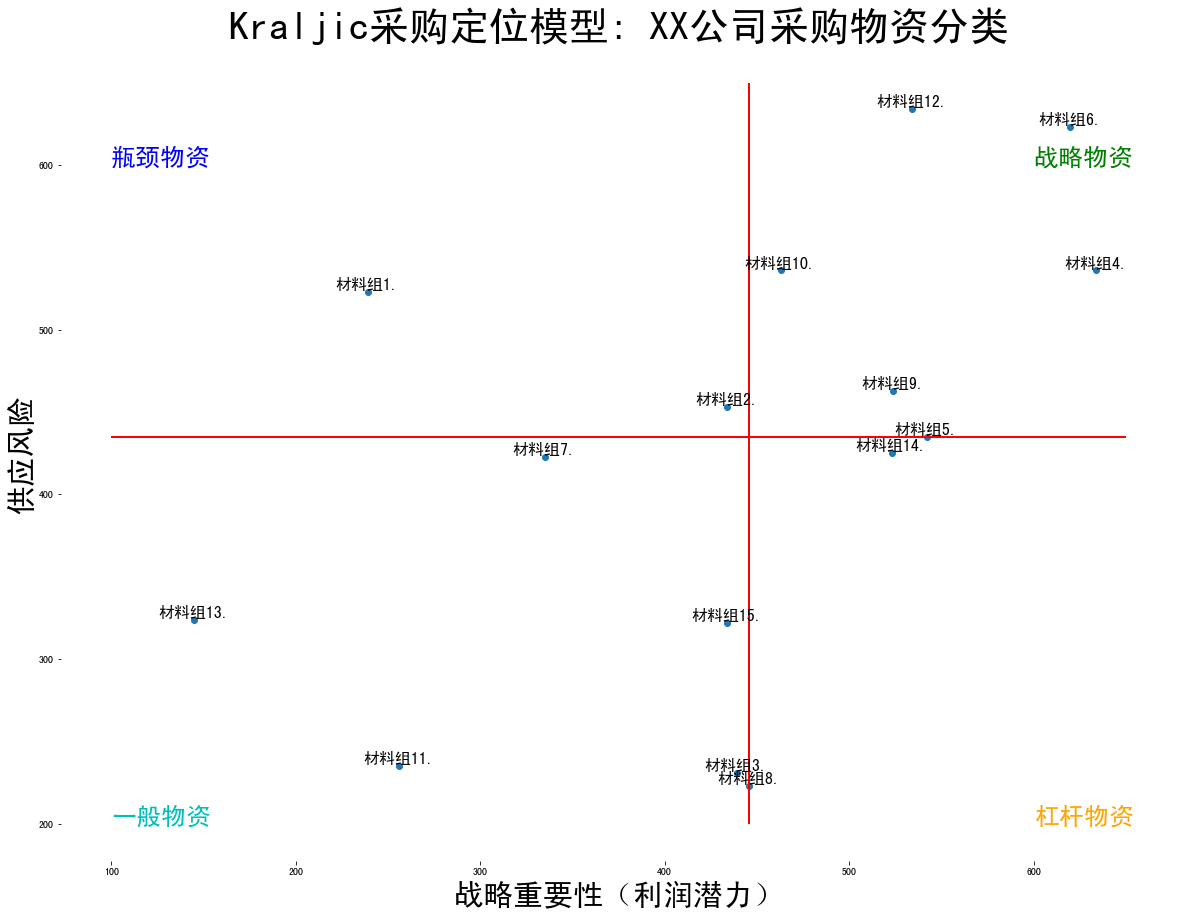

In [98]:
f = plt.figure(figsize=(20, 15))
x = df['money_woe']
y = df['risk_woe']
label = df['material_group_name']

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.scatter(x=df['money_woe'], y=df['risk_woe'])
plt.xlabel('战略重要性（利润潜力）', fontsize=30)
plt.ylabel('供应风险', fontsize=30)
plt.title('Kraljic采购定位模型: XX公司采购物资分类', fontsize=40)

# 对散点图中的每一个点进行文字标注
 ## 固定代码，无需深究，拿来即用
for a, b, l in zip(df['money_woe'], df['risk_woe'], label):
    plt.text(a, b+0.1, '%s.' % l, ha='center', va='bottom', fontsize=16)
    #  0.1 向上轻微偏移

# 添加特定分割线
 ## vlines: vertical 垂直于 x 轴的线，在变量'经济总量'的均值处开始画，
   ## y 轴的范围[1.5, 3]
plt.vlines(x=df['money_woe'].median(), ymin=200, ymax=650,
          colors='r', linewidth=2)
plt.hlines(y=df['risk_woe'].median(), xmin=100, xmax=650,
          colors='r', linewidth=2)
# 背景网格
# plt.grid(True)

plt.text(600, 600, '战略物资', fontsize=25, color='green')
plt.text(600, 200, '杠杆物资', fontsize=25, color='orange')
plt.text(100, 600, '瓶颈物资', fontsize=25, color='blue')
plt.text(100, 200, '一般物资', fontsize=25, color='c')

# 定制需求：隐去四周的边框线条
sns.despine(trim=True, left=True, bottom=True)

In [99]:
f.savefig('./Kraljic采购定位模型.jpg', dpi=150)